In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import yfinance as yf


In [9]:
msft = yf.Ticker("MSFT")
msft_history = msft.history(start="2016-01-01", end="2022-03-03")
tabela = msft_history
 # lê os dados do banco csv com pandas
display(tabela)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-01-04 00:00:00-05:00,48.578672,49.007938,47.746968,49.007938,53778000,0.0,0.0
2016-01-05 00:00:00-05:00,49.124206,49.535586,48.775427,49.231522,34079700,0.0,0.0
2016-01-06 00:00:00-05:00,48.578675,48.650221,47.970546,48.337212,39518900,0.0,0.0
2016-01-07 00:00:00-05:00,47.129899,47.836401,46.566485,46.655914,56564900,0.0,0.0
2016-01-08 00:00:00-05:00,46.834773,47.648591,46.638028,46.799004,48754000,0.0,0.0
...,...,...,...,...,...,...,...
2022-02-24 00:00:00-05:00,269.862550,292.292497,268.882147,291.728027,56989700,0.0,0.0
2022-02-25 00:00:00-05:00,292.272729,294.738529,288.816614,294.421631,32546700,0.0,0.0
2022-02-28 00:00:00-05:00,291.450780,296.233874,290.153509,295.887268,34627500,0.0,0.0


In [10]:
display(tabela.corr())# calcula quanto cada item está relacionado com cada
# ex: quanto o valor de propagandas em tv está relacionado com o valor de vendas

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.999841,0.999814,0.999647,0.039192,0.026472,NaN
High,0.999841,1.000000,0.999734,0.999809,0.045889,0.026129,NaN
Low,0.999814,0.999734,1.000000,0.999817,0.030346,0.026764,NaN
Close,0.999647,0.999809,0.999817,1.000000,0.037184,0.026355,NaN
Volume,0.039192,0.045889,0.030346,0.037184,1.000000,-0.020687,NaN
Dividends,0.026472,0.026129,0.026764,0.026355,-0.020687,1.000000,NaN
Stock Splits,NaN,NaN,NaN,NaN,NaN,NaN,NaN


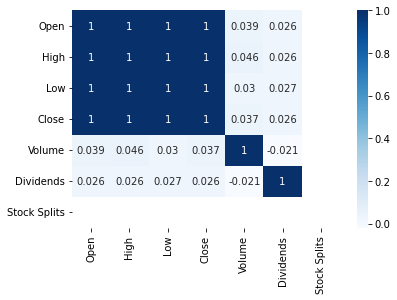

In [11]:
sns.heatmap(tabela.corr(), cmap='Blues', annot=True) # função do seaborn para criar um grafico heatmap
# o grafico tem o cmap que diz qual deve ser a combinação de cores
# e o parametro annot que dizer se é para ser anotado o valor de cada bloco nele mesmo
plt.show()
# o seaborn é uma biblioteca baseada no pyplot, por isso ao usa-la deve-se fazer o plt.show

In [45]:
# agora vamos usar os dados para prever
y = tabela['Close'] # colocamos em y o que queremos prever

x = tabela[['Open', 'High', 'Low']] # colocamos em x quem ou quais dados vou usar para prever o y

xtreino, xteste, ytreino, yteste = train_test_split(x, y)
# podemos definir qual porcentagem que queremos direcionar para treino, basta usar ex: "test_size=0.3"
# essa função necessita de armazenar dados em 4 variaveis
# primeiro é criada a variavel
# depois a função é executada e é ai que acontece o ebaralhamento dos dados (quem vai para treino e quem vai para teste)
# depois de ter os dados de teste e os dados de treino separados, agora está na hora de treinar de fato.
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# importamos esses dois modelos de inteligencias artificiais para treinar e vamos ver os resultados de cada uma delas

modelo_arvoredecisao = RandomForestRegressor()
# criamos ela armazenando em uma variavel
modelo_arvoredecisao.fit(xtreino, ytreino)
# treina as inteligencias artificias, pois poderemos usar a função fit e passar os valores de treino

#depois precisamos ver se a previsão está legal e vamos fazer um teste
from sklearn.metrics import r2_score
prev_arvore = modelo_arvoredecisao.predict(xteste)

# mostra a eficacia de cada modelo
print(r2_score(yteste, prev_arvore))

tabela_nova = pd.read_csv('novos_fin.csv')
previsao = modelo_arvoredecisao.predict(tabela_nova)
display(tabela_nova)
display(msft.history(start="2022-03-03", end="2023-01-01"))


print(previsao)
# mostra a previsão com base nos novos dados recebidos

0.999651829168489


,Open,High,Low
0,299.947423,300.185082,291.193277
1,291.430961,292.787647,284.380137
2,285.726915,286.875649,275.824065


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-03 00:00:00-05:00,299.947423,300.185082,291.193277,293.045135,27314500,0.0,0.0
2022-03-04 00:00:00-05:00,291.430961,292.787647,284.380137,287.043976,32356500,0.0,0.0
2022-03-07 00:00:00-05:00,285.726915,286.875649,275.824065,276.200378,43157200,0.0,0.0
2022-03-08 00:00:00-05:00,275.101142,281.201301,267.376932,273.170105,48159500,0.0,0.0
2022-03-09 00:00:00-05:00,280.686365,286.786524,278.052204,285.697205,35204500,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,235.520096,238.273195,233.355519,238.133545,21207000,0.0,0.0
2022-12-27 00:00:00-05:00,238.103624,238.333045,235.240799,236.367981,16688600,0.0,0.0
2022-12-28 00:00:00-05:00,236.298135,239.121066,233.584930,233.944031,17457100,0.0,0.0


[293.41838501 289.88666962 278.51512543]
